In [1]:
component_level="attention-head" # or mlp-neuron
model_name = "llama-2-7b-chat-hf"
dataset_name = "counterfact"

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

path = f"../{component_level}-attribution/results/{model_name}_mask_{dataset_name}_data_results.json"

# Load data
with open(path, 'r') as f:
    data = json.load(f)

# Initialize dictionaries for different masking methods
methods = {
    'DePass': {'top': {}, 'bottom': {}},
    'DePass-abs': {'top': {}, 'bottom': {}},
    'atp': {'top': {}, 'bottom': {}},
    'random': {'top': {}, 'bottom': {}},
    'norm': {'top': {}, 'bottom': {}},
    'coef': {'top': {}, 'bottom': {}}
}

total_samples = len(data)


for item in data:
    for method in methods:
        method_key = method.replace('-', '_')
        for direction in ['top', 'bottom']:
            key_prefix = f'answer_masked_{method_key}_{direction}'
            if key_prefix in item:
                for key, value in item[key_prefix].items():
                    if key.startswith(f'correct_masked_{direction}_'):
                        percent = float(key.split('_')[-1])
                        methods[method][direction][percent] = methods[method][direction].get(percent, 0) + int(value)

for method in methods:
    for direction in methods[method]:
        for percent in methods[method][direction]:
            methods[method][direction][percent] = (methods[method][direction][percent] / total_samples) * 100

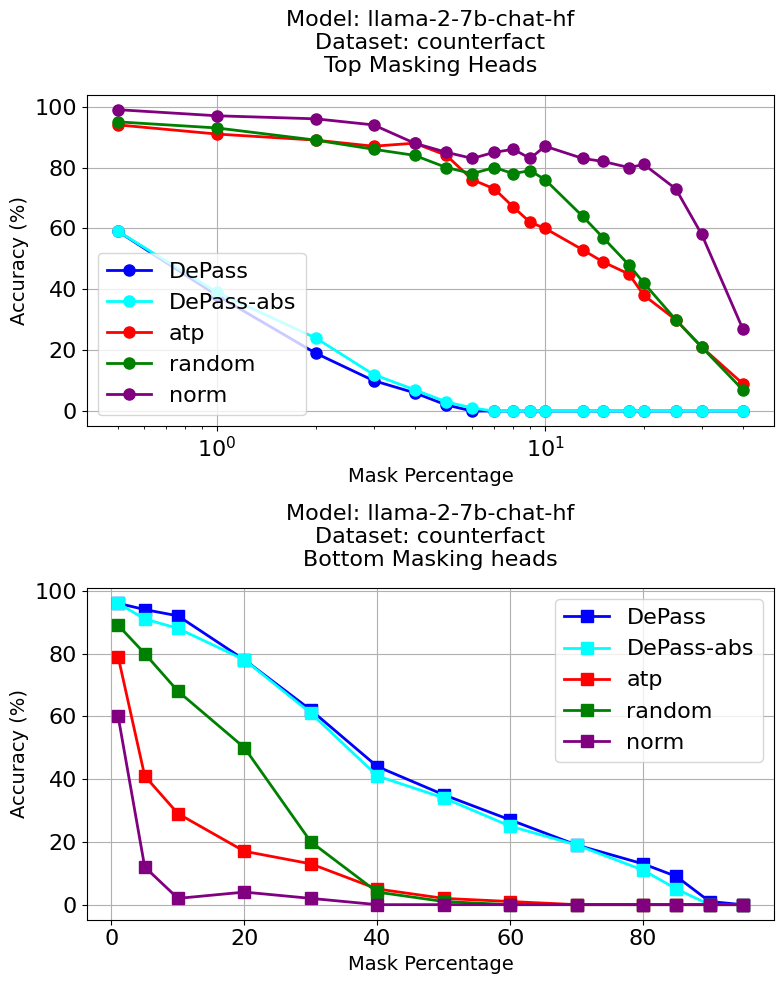

In [3]:
# Create plots
plt.rcParams.update({'font.size': 12})
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Colors for different methods with renamed keys
colors = {
    'DePass': 'blue',
    'DePass-abs': 'cyan',
    'atp': 'red',
    'random': 'green',
    'norm': 'purple',
    'coef': 'orange'
}

# Method name mapping
method_names = {
    'DePass': 'DePass',
    'DePass-abs': 'DePass-abs',
    'atp': 'atp',
    'random': 'random',
    'norm': 'norm',
    'coef': 'coef'
}
for method in methods:
    if methods[method]['top']:
        x = sorted(methods[method]['top'].keys())
        y = [methods[method]['top'][k] for k in x]
        ax1.plot(x, y, label=method_names[method], color=colors[method], 
                marker='o', linewidth=2, markersize=8)
ax1.set_xscale('log')
ax1.grid(True)
ax1.set_xlabel('Mask Percentage', fontsize=14)
ax1.set_ylabel('Accuracy (%)', fontsize=14)
ax1.set_title(f'Model: {model_name}\nDataset: {dataset_name}\nTop Masking Heads', 
              fontsize=16, pad=16)
ax1.legend(fontsize=16, loc='lower left')
ax1.tick_params(axis='both', which='major', labelsize=16)
for method in methods:
    if methods[method]['bottom']:
        x = sorted(methods[method]['bottom'].keys())
        y = [methods[method]['bottom'][k] for k in x]
        ax2.plot(x, y, label=method_names[method], color=colors[method], 
                marker='s', linewidth=2, markersize=8)
ax2.set_xscale('linear')
ax2.grid(True)
ax2.set_xlabel('Mask Percentage', fontsize=14)
ax2.set_ylabel('Accuracy (%)', fontsize=14)
ax2.set_title(f'Model: {model_name}\nDataset: {dataset_name}\nBottom Masking heads', 
              fontsize=16, pad=16)
ax2.legend(fontsize=16, loc='upper right')
ax2.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()